<a href="https://colab.research.google.com/github/debadattasarangi/ML/blob/main/Apolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import numpy as np
import pandas as pd
import matplotlib as mtp
import seaborn as sns

In [87]:
from scipy import stats
from scipy.stats import ttest_ind 
from scipy.stats import shapiro 
from scipy.stats import levene
from scipy.stats import f_oneway 
from scipy.stats import chi2_contingency

In [88]:
df=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/681/original/scaler_apollo_hospitals.csv")

In [89]:
df.head()

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667


# **Define Problem Statement and perform Exploratory Data Analysis**

In [90]:
# We have 8 features and 1338 records
# We need to remove unnamed column
# Data set have int , float and object types data
# There is no null value available
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1338 non-null   int64  
 1   age                      1338 non-null   int64  
 2   sex                      1338 non-null   object 
 3   smoker                   1338 non-null   object 
 4   region                   1338 non-null   object 
 5   viral load               1338 non-null   float64
 6   severity level           1338 non-null   int64  
 7   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 83.8+ KB


In [91]:
 # Mean age of patient was 39
 # Min age=18 and max age=64
 # Min severity was 0 and maximum severity was 5
 # Minimum varius present in patient was 5.32 and maximum was 17.71 and mean was 10.221
 # Mean hospitalization charge was 33176.05 wher min charge was 2805 and max was 159426
 
 df.describe()

,Unnamed: 0,age,viral load,severity level,hospitalization charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,10.221233,1.094918,33176.058296
std,386.391641,14.049960,2.032796,1.205493,30275.029296
min,0.000000,18.000000,5.320000,0.000000,2805.000000
25%,334.250000,27.000000,8.762500,0.000000,11851.000000
50%,668.500000,39.000000,10.130000,1.000000,23455.000000
75%,1002.750000,51.000000,11.567500,2.000000,41599.500000
max,1337.000000,64.000000,17.710000,5.000000,159426.000000


In [92]:
# More patient belongs to male group 
# More patient belongs to southeast region
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [93]:
# detecting missing values
df.isna().sum()

Unnamed: 0                 0
age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64

In [94]:
# Removed unnamed column
df.drop('Unnamed: 0', inplace=True, axis=1)

In [95]:

df.nunique()

age                          47
sex                           2
smoker                        2
region                        4
viral load                  462
severity level                6
hospitalization charges    1320
dtype: int64

In [96]:
# As we can see count of female and male patients same 
# we have 14 more patients more as compared to female
df.groupby('sex').count()

,age,smoker,region,viral load,severity level,hospitalization charges
sex,,,,,,
female,662,662,662,662,662,662
male,676,676,676,676,676,676


In [97]:
# very young patients are admited to hospital
df.groupby('age').count()

,sex,smoker,region,viral load,severity level,hospitalization charges
age,,,,,,
18,69,69,69,69,69,69
19,68,68,68,68,68,68
20,29,29,29,29,29,29
21,28,28,28,28,28,28
22,28,28,28,28,28,28
23,28,28,28,28,28,28
24,28,28,28,28,28,28
25,28,28,28,28,28,28
26,28,28,28,28,28,28


In [98]:
# As you can see more than 75% of patients dont smoke
df.groupby('smoker').count()

,age,sex,region,viral load,severity level,hospitalization charges
smoker,,,,,,
no,1064,1064,1064,1064,1064,1064
yes,274,274,274,274,274,274


In [99]:
df.groupby(['age','smoker']).count()

sex  region  viral load  severity level  hospitalization charges
age smoker                                                                  
18  no       57      57          57              57                       57
    yes      12      12          12              12                       12
19  no       50      50          50              50                       50
    yes      18      18          18              18                       18
20  no       20      20          20              20                       20
...         ...     ...         ...             ...                      ...
62  yes       4       4           4               4                        4
63  no       18      18          18              18                       18
    yes       5       5           5               5                        5
64  no       15      15          15              15                       15
    yes       7       7           7               7                        7

[94 rows x 5 columns]

In [100]:
df.groupby('region').count()

,age,sex,smoker,viral load,severity level,hospitalization charges
region,,,,,,
northeast,324,324,324,324,324,324
northwest,325,325,325,325,325,325
southeast,364,364,364,364,364,364
southwest,325,325,325,325,325,325


Outlier detection

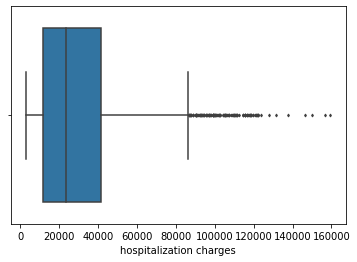

In [101]:
# 'hospitalization charges' have some outliers
sns.boxplot(data=df,x='hospitalization charges',fliersize=2)

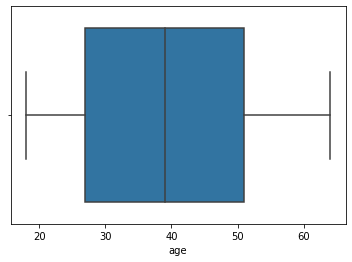

In [102]:
sns.boxplot(data=df,x='age',fliersize=2)

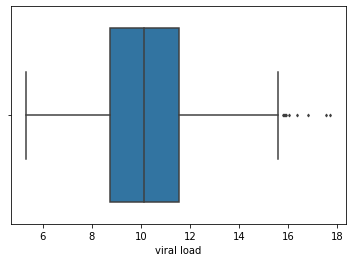

In [103]:
# 'viral load' have some outliers
sns.boxplot(data=df,x='viral load',fliersize=2)

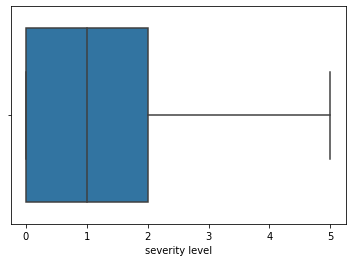

In [104]:
sns.boxplot(data=df,x='severity level',fliersize=2)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


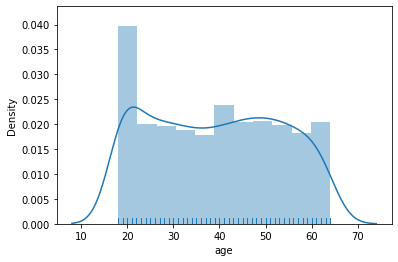

In [105]:
sns.distplot( a=df.age,rug=True)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


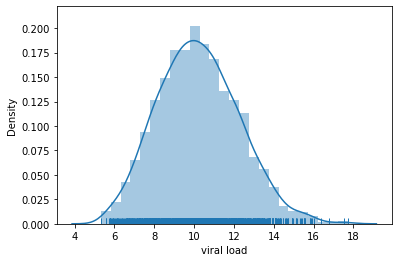

In [106]:
sns.distplot( a=df['viral load'],rug=True)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


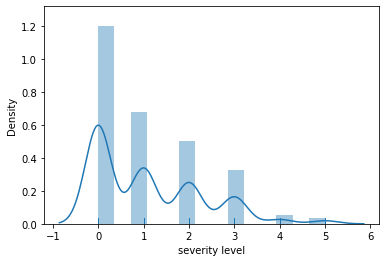

In [107]:
sns.distplot( a=df['severity level'],rug=True)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


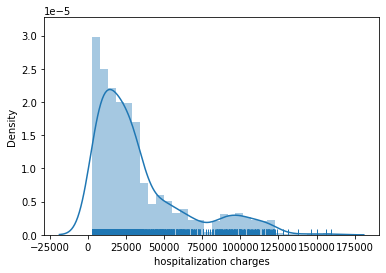

In [108]:
sns.distplot( a=df['hospitalization charges'],rug=True)

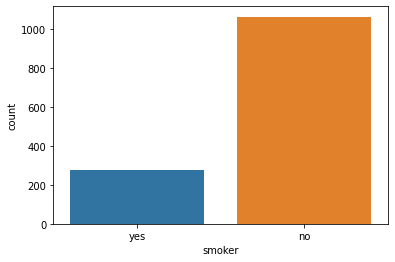

In [109]:
sns.countplot( x=df.smoker)

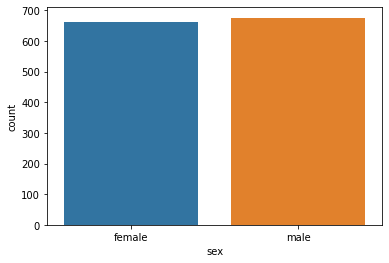

In [110]:
sns.countplot( x=df.sex)

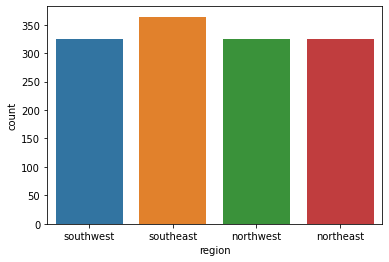

In [111]:
sns.countplot( x=df.region)

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


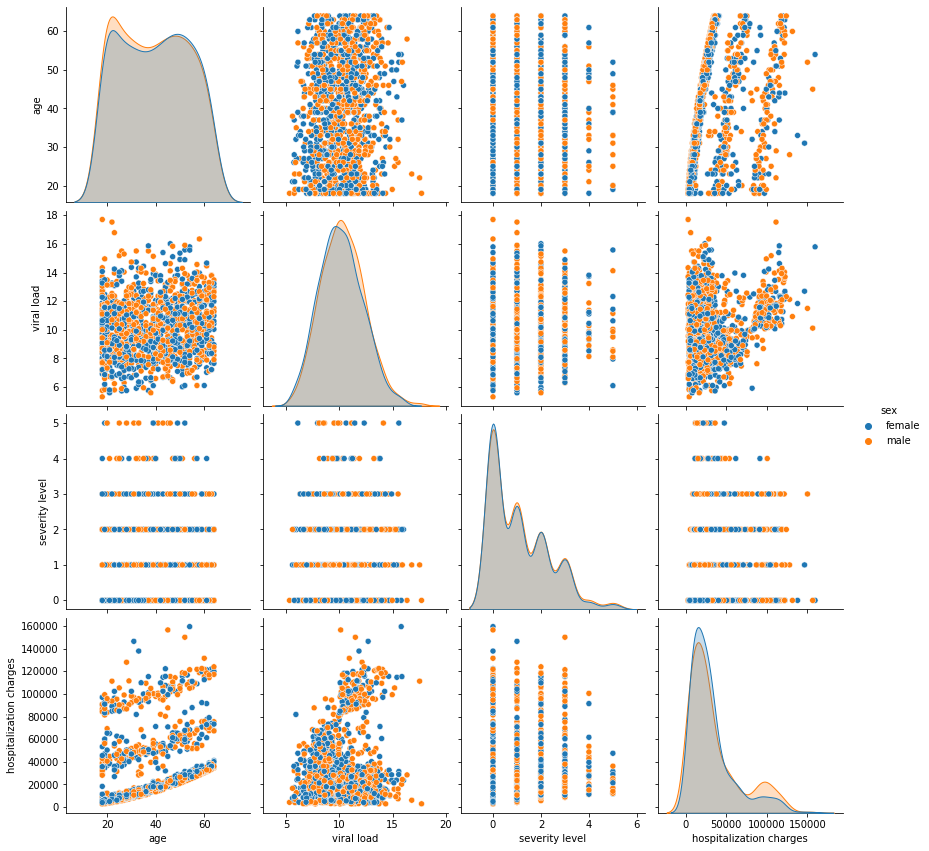

In [112]:
sns.pairplot(df,hue="sex",size=3)

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


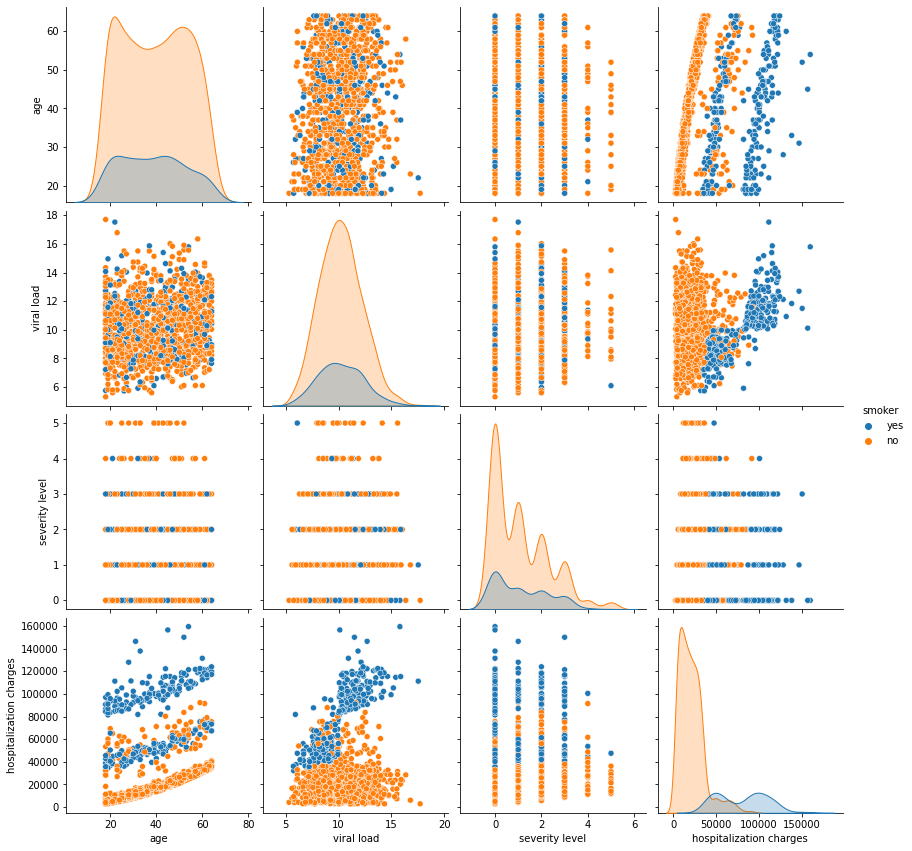

In [113]:
# if we compare hospital charge with the smoker and age , patients who are smoking there hospitalization charge is more than 30000
sns.pairplot(df,hue="smoker",size=3)

Bivariate Analysis (Relationships between important variables such as hospitalization charges with region, smoker, viral load etc)

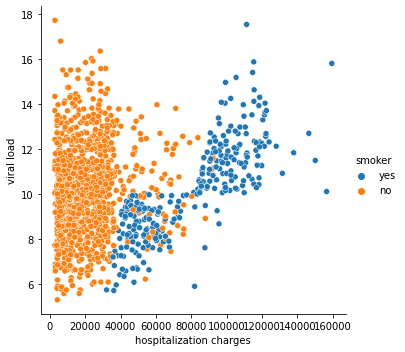

In [114]:
sns.relplot(x = 'hospitalization charges', y = 'viral load', data = df,kind="scatter",hue='smoker')

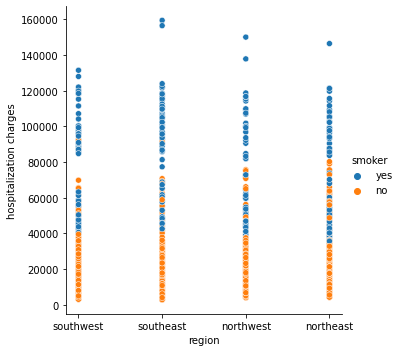

In [115]:
# we can say that smoking directly impacts the human body ,those who are smoking there hospital bill is more 
sns.relplot(x = 'region', y = 'hospitalization charges', data = df,kind="scatter",hue='smoker')

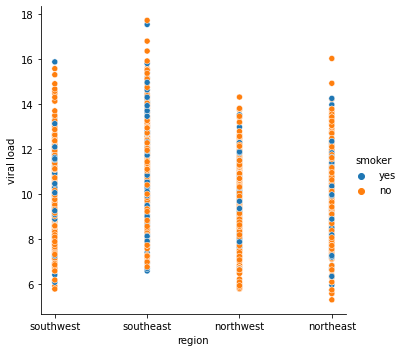

In [116]:
sns.relplot(x = 'region', y = 'viral load', data = df,kind="scatter",hue='smoker')

In [117]:
df_northeast=df.where(df['region']=='northeast')
df_northeast.dropna(axis=0,inplace=True)

In [118]:
df_northwest=df.where(df['region']=='northwest')
df_northwest.dropna(axis=0,inplace=True)

In [119]:
df_southwest=df.where(df['region']=='southwest')
df_southwest.dropna(axis=0,inplace=True)

In [120]:
df_southeast=df.where(df['region']=='southeast')
df_southeast.dropna(axis=0,inplace=True)

In [121]:
print(df_northeast.info())
print("-----------------------------------------------------------------------------------------")
print(df_northwest.info())
print("-----------------------------------------------------------------------------------------")
print(df_southwest.info())
print("-----------------------------------------------------------------------------------------")
print(df_southeast.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 8 to 1334
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      324 non-null    float64
 1   sex                      324 non-null    object 
 2   smoker                   324 non-null    object 
 3   region                   324 non-null    object 
 4   viral load               324 non-null    float64
 5   severity level           324 non-null    float64
 6   hospitalization charges  324 non-null    float64
dtypes: float64(4), object(3)
memory usage: 20.2+ KB
None
-----------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 3 to 1337
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      325 non-null    fl

In [122]:
df_northeast.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
8,37.0,male,no,northeast,9.94,2.0,16016.0
10,25.0,male,no,northeast,8.74,0.0,6803.0
16,52.0,female,no,northeast,10.26,1.0,26993.0
17,23.0,male,no,northeast,7.95,0.0,5988.0
20,60.0,female,no,northeast,12.00,0.0,33072.0


In [123]:
df_northeast.groupby(['age','sex','smoker']).count()

region  viral load  severity level  \
age  sex    smoker                                       
18.0 female no          14          14              14   
            yes          1           1               1   
     male   no          11          11              11   
            yes          6           6               6   
20.0 female no           2           2               2   
...                    ...         ...             ...   
63.0 female no           2           2               2   
            yes          1           1               1   
     male   no           2           2               2   
64.0 female no           2           2               2   
     male   no           2           2               2   

                    hospitalization charges  
age  sex    smoker                           
18.0 female no                           14  
            yes                           1  
     male   no                           11  
            yes                           6  
20.0 female no                            2  
...                                     ...  
63.0 female no                            2  
            yes                           1  
     male   no                            2  
64.0 female no                            2  
     male   no                            2  

[142 rows x 4 columns]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


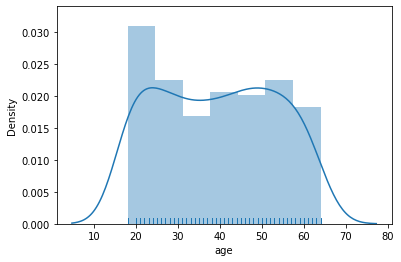

In [124]:
# distribution of age column
sns.distplot( a=df_northeast.age,rug=True)

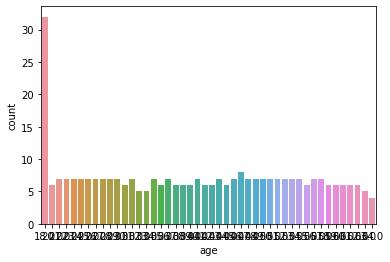

In [125]:
sns.countplot( x=df_northeast.age)

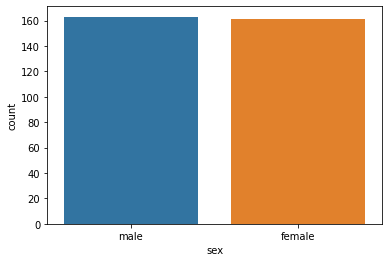

In [126]:
# Male and female patients are almost same
sns.countplot( x=df_northeast.sex)

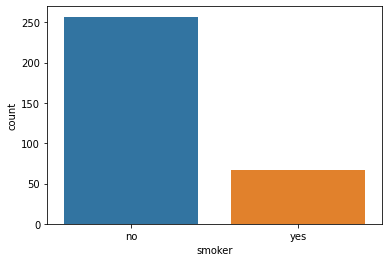

In [127]:
# less patients smoking
sns.countplot( x=df_northeast.smoker)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


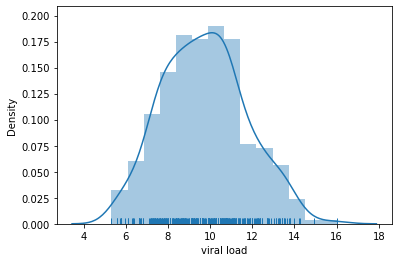

In [128]:
sns.distplot(a=df_northeast['viral load'],rug=True)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


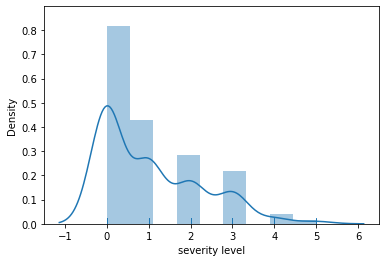

In [129]:
# more than 50% of students has severity level <3
sns.distplot(a=df_northeast['severity level'],rug=True)

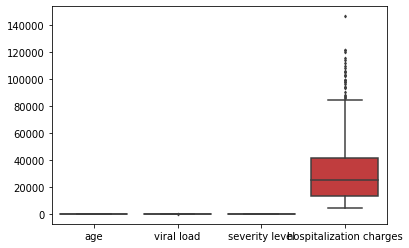

In [130]:

sns.boxplot(data=df_northeast,fliersize=2)


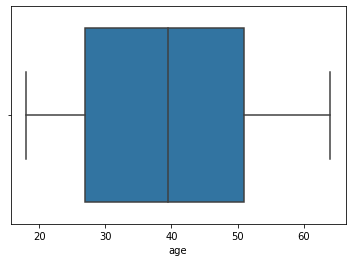

In [131]:
sns.boxplot(data=df_northeast,x='age',fliersize=2)

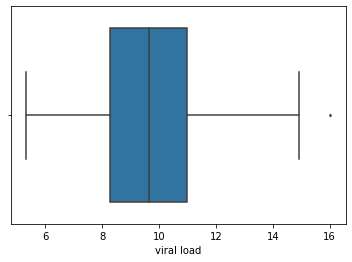

In [132]:
sns.boxplot(data=df_northeast,x='viral load',fliersize=2)

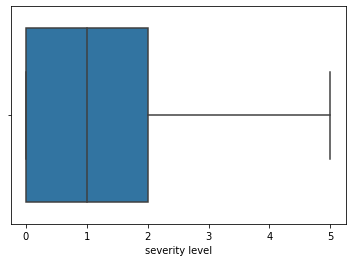

In [133]:
sns.boxplot(data=df_northeast,x='severity level',fliersize=2)

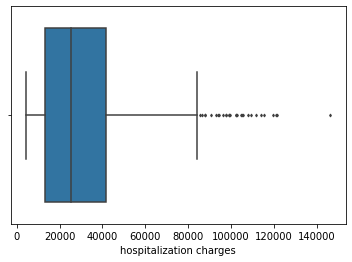

In [134]:
# some outlier presents in the hospitalization charges features
sns.boxplot(data=df_northeast,x='hospitalization charges',fliersize=2)

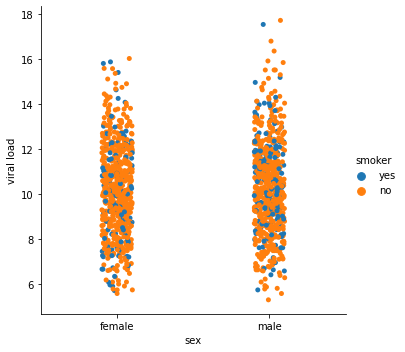

In [135]:
sns.catplot(x = 'sex', y = 'viral load', data =df,hue="smoker")

In [136]:
print(df_northeast.groupby(['smoker']).count())
print("-----------------------------------------------------------------------------------------")
print(df_northwest.groupby(['smoker']).count())
print("-----------------------------------------------------------------------------------------")
print(df_southwest.groupby(['smoker']).count())
print("-----------------------------------------------------------------------------------------")
print(df_southeast.groupby(['smoker']).count())

        age  sex  region  viral load  severity level  hospitalization charges
smoker                                                                       
no      257  257     257         257             257                      257
yes      67   67      67          67              67                       67
-----------------------------------------------------------------------------------------
        age  sex  region  viral load  severity level  hospitalization charges
smoker                                                                       
no      267  267     267         267             267                      267
yes      58   58      58          58              58                       58
-----------------------------------------------------------------------------------------
        age  sex  region  viral load  severity level  hospitalization charges
smoker                                                                       
no      267  267     267         267    

# **Statistical Analysis:**

# *Prove (or disprove) that the hospitalization of people who do smoking is greater than those who don't? (T-test Right tailed)*

𝐻0: hospitalization charge of people who do smoking is less than those who don't

𝐻𝑎:  hospitalization charge of people who do smoking is greater than those who don't

Let 𝜇1 and 𝜇2 be the average no. of patients who do smoking and respectively.

Mathematically, the above formulated hypothesis can be written as:

𝐻0:𝜇1<𝜇2
𝐻𝑎:𝜇1>𝜇2

In [137]:
charge=df['hospitalization charges']

In [138]:
smoking = df[df['smoker'] == 'yes']['hospitalization charges'].sample(274)
not_smoking = df[df['smoker'] == 'no']['hospitalization charges'].sample(274)

In [139]:
print('The sample standard deviation of the smoker is:', round(smoking.std(), 2))
print('The sample standard deviation of the non smoker is:', round(not_smoking.std(), 2))

The sample standard deviation of the smoker is: 28853.89
The sample standard deviation of the non smoker is: 15146.0


In [140]:
alpha = 0.05

In [141]:
def result(p_value, alpha):
  if p_value < alpha:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
  else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

In [142]:
test_stat, p_value = ttest_ind(smoking, not_smoking, equal_var=False, alternative='greater')
print('The p-value is : ', p_value)

result(p_value, alpha)

The p-value is :  4.417806812883559e-104
As the p-value 4.417806812883559e-104 is less than the level of significance, we reject the null hypothesis.


In [143]:
w, p_value = shapiro(df['hospitalization charges'].sample(274)) 
print('The p-value is : ', p_value)

result(p_value, alpha)

The p-value is :  5.2320364884061077e-17
As the p-value 5.2320364884061077e-17 is less than the level of significance, we reject the null hypothesis.


**Hospitalization charge of patients who smoke is more as compare to who dont smoke**

# *Prove (or disprove) with statistical evidence that the viral load of females is different from that of males (T-test Two tailed)*

𝐻0:viral load of female== viral load of male

𝐻𝑎:  viral load of female != viral load of male
𝐻0:𝜇1==𝜇2
𝐻𝑎:𝜇1!=𝜇2

In [144]:
v_load=df['viral load']

In [145]:
male = df[df['sex'] == 'male']['viral load'].sample(662)
female = df[df['sex'] == 'female']['viral load'].sample(662)

In [146]:
print('The sample standard deviation of the smoker is:', round(male.std(), 2))
print('The sample standard deviation of the non smoker is:', round(female.std(), 2))

The sample standard deviation of the smoker is: 2.05
The sample standard deviation of the non smoker is: 2.02


In [147]:
alpha = 0.05

In [148]:
test_stat, p_value = ttest_ind(male, female, equal_var=False, alternative='two-sided')
print('The p-value is : ', p_value)

result(p_value, alpha)

The p-value is :  0.10213711695406598
As the p-value 0.10213711695406598 is greater than the level of significance, we fail to reject the null hypothesis.


In [149]:
w, p_value = shapiro(df['viral load'].sample(662)) 
print('The p-value is : ', p_value)

result(p_value, alpha)

The p-value is :  0.00016505253734067082
As the p-value 0.00016505253734067082 is less than the level of significance, we reject the null hypothesis.


In [150]:
stat, p_value = levene(male,female)
print('The p-value is : ', p_value)

result(p_value, alpha)

The p-value is :  0.9049402326460039
As the p-value 0.9049402326460039 is greater than the level of significance, we fail to reject the null hypothesis.


# Is the proportion of smoking significantly different across different regions? (Chi-square)

In [151]:
region_smoke=df[['smoker','region']]

In [152]:
data_region=pd.crosstab(index=region_smoke['smoker'],columns=region_smoke['region'])
data_region

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


Ho:smoking same in all region

Ha:smoking not same in all region

In [153]:
s,p,d,e=chi2_contingency(data_region)
print(s)
print("--------------")
print(p)
print("--------------")
print(d)
print("--------------")
print(result(p,alpha))


7.34347776140707
--------------
0.06171954839170547
--------------
3
--------------
As the p-value 0.06171954839170547 is greater than the level of significance, we fail to reject the null hypothesis.
None


We can say that smoking is same in all region

# Is the mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the same? Explain your answer with statistical evidence (One way Anova)

 H0: mean viral load of females is same in all saverity level 
 
 Ha: mean viral load of females is not same in all saverity level 

In [154]:
load=[]
df_women_anova=df[df['sex']=='female']
for i in df_women_anova['severity level'].unique():
  load.append(df_women_anova['severity level']==i)

In [155]:
a=df_women_anova[df['severity level']==0]
b=df_women_anova[df['severity level']==1]
c=df_women_anova[df['severity level']==2]

<ipython-input-155-e6b96fdacaac>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a=df_women_anova[df['severity level']==0]
<ipython-input-155-e6b96fdacaac>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  b=df_women_anova[df['severity level']==1]
<ipython-input-155-e6b96fdacaac>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c=df_women_anova[df['severity level']==2]


In [156]:
print(a.info())
print(b.info())
print(c.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      289 non-null    int64  
 1   sex                      289 non-null    object 
 2   smoker                   289 non-null    object 
 3   region                   289 non-null    object 
 4   viral load               289 non-null    float64
 5   severity level           289 non-null    int64  
 6   hospitalization charges  289 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 18.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 6 to 1302
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      158 non-null    int64  
 1   sex                      158 non-null    object 
 2   smoker         

In [157]:
test_stat, p_value = f_oneway(a['viral load'].sample(119),b['viral load'].sample(119),c['viral load'].sample(119))
print('The p-value is : ', p_value)

result(p_value, alpha)

The p-value is :  0.6686029543220489
As the p-value 0.6686029543220489 is greater than the level of significance, we fail to reject the null hypothesis.


# Business insight and recomendation 

#1- We have 8 features and 1338 records
#2- We need to remove unnamed column
#3- Data set have int , float and object types data
#4- There is no null value available

#5- Mean age of patient was 39
# 6-Min age=18 and max age=64
#7- Min severity was 0 and maximum severity was 5
# 8-Minimum varius present in patient was 5.32 and maximum was 17.71 and mean was 10.221
# 9-Mean hospitalization charge was 33176.05 wher min charge was 2805 and max was 159426

#10- More patient belongs to male group 
# 11-More patient belongs to southeast region
# 12-As we can see count of female and male patients same 
#13- we have 14 more patients more as compared to female
# 14-very young patients are admited to hospital

# 15-As you can see more than 75% of patients dont smoke
# 16-if we compare hospital charge with the smoker and age , patients who are smoking there hospitalization charge is more than 30000
#17- we can say that smoking directly impacts the human body ,those who are smoking there hospital bill is more 
# 18-more than 50% of students has severity level <3

#19- Hospitalization charge of patients who smoke is more as compare to who dont smoke
#20- viral load of female== viral load of male
# 21-We can say that smoking is same in all region
#22- mean viral load of females is same in all saverity level

***RECOMENDATION***
# We need to start some sompaign or some awarness program to stop smoking , as smoking directly impacrs the viral load and severity level of the patients which also increases the hospitalization cost .


